In [28]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Минипроект

Опираясь на [карту](https://eusipa.org/wp-content/uploads/European_map_20160530_2016.pdf) Европейской ассоциации структурных инвестиционных
продуктов (EUSIPA) и ее [российскую адаптацию](https://naufor.ru/tree.asp?n=22890)

привести 2-3 ссылки на

*   структурные продукты, представленные на россиском рынке,
*   доступные наборы данных (напрмер, [HKEX](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)).

Структурные продукты на российском рынке:
Сбербанк – Структурированные инвестиционные продукты

Ссылка: https://www.sberbank.ru/ru/individual/investments/structured-products
Описание: Предлагает широкий ассортимент структурированных продуктов, включая опционы, деривативы и инвестиционные ноты с различными уровнями риска и доходности.
ВТБ – Структурированные инвестиции

Ссылка: https://www.vtb.ru/personal/investments/products/structured-products/
Описание: ВТБ предлагает структурированные продукты, ориентированные на разные сегменты рынка, включая защиту капитала и участие в росте индексов.
ФИНАМ – Структурированные инвестиционные решения

Ссылка: https://www.finam.ru/investment-products/structured-products/
Описание: ФИНАМ предоставляет разнообразные структурированные продукты, включая депозитные ноты и продукты с капитализацией дохода.
Доступные наборы данных:
Московская Биржа (MOEX) – Исторические данные по структурированным продуктам

Ссылка: https://www.moex.com/ru/products/structured-products.aspx
Описание: Предоставляет доступ к информации о торгуемых структурированных продуктах, включая цены, объемы торгов и исторические данные.
Центральный банк Российской Федерации – Финансовая статистика

Ссылка: https://www.cbr.ru/statistics/
Описание: Официальный источник финансовой статистики, включая данные по рынку структурированных продуктов, процентным ставкам и другим экономическим показателям.
БКС Премьер – Аналитические данные и исследования по структурированным продуктам

Ссылка: https://www.bcs.ru/analytics/structured-products/
Описание: Предоставляет аналитические отчёты, исследования и данные по структурированным инвестиционным продуктам, доступные для инвесторов и аналитиков.

# Cтруктурный продукт с полной защитой капитала

## СП с использованием бинарных опционов

Пример. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается, что текущая цена акции, равная 100 руб., не изменится более чем на 10%. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная
ставка – 7%.

Постройте структурный продукт с полной защитой капитала и использованием опционной стратегии бинарный диапазон (binary range).

In [29]:
# оценка стоимости бинарного опциона колл
def binary_option_call(t, S, K, T, r, q, sigma):

    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(d1)

# оценка стоимости бинарного опциона пут
def binary_option_put(t, S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*(T))/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if t == 'cash-or-nothing':
      return np.exp(-r*T)*norm.cdf(-d2)
    if t == 'asset-or-nothing':
      return S*np.exp(-q*T)*norm.cdf(-d1)

In [30]:
S = 100
K = 100
T = 1
r = 0.07
q = 0
N = 100000
sigma = 0.3
n = 100

In [31]:
K=90
b90 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
K=110
b110 = binary_option_call('cash-or-nothing', S, K, T, r, q, sigma)
print('digital range = ', b90-b110)

digital range =  0.24307515482345715


In [32]:
risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(b90-b110))
print('количество опционных стратегий', Q)

количество опционных стратегий 27813


In [33]:
print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

максимальная доходность, годовых =  0.27813
максимальная доходность, непрерывно =  0.24539807222181784


In [34]:
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

Пример. Постройте график доходности структурного продукта в сравнении с доходностью базового актива и безрисковой ставки.

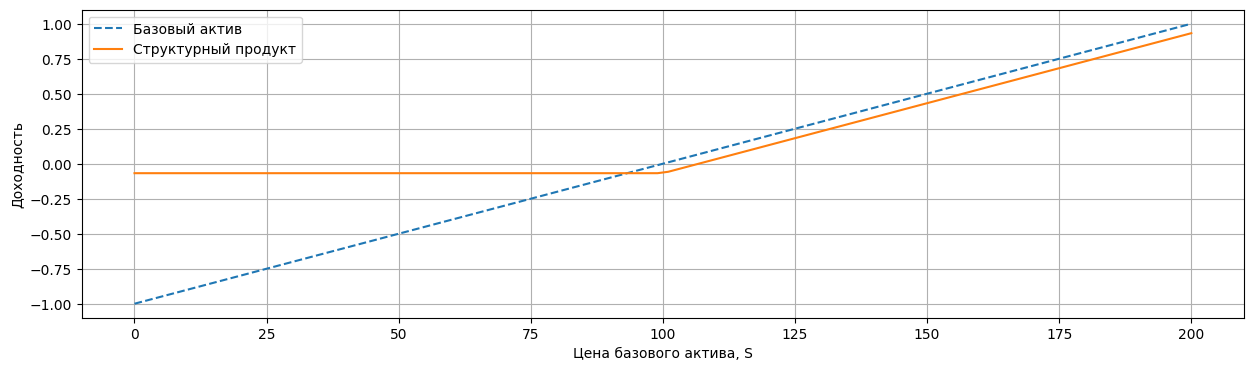

In [35]:
risk_part = N - N * np.exp(-r * T)
c = call(S, K, T, sigma, r, q)
PR = S * round(risk_part / c) / N

underlying_asset_profit = np.linspace(- S, S, n) / S
struct_product_profit = np.maximum(0, underlying_asset_profit) - round(risk_part / c) * c / N

x = np.linspace(0, 2 * S, n)
plt.figure(figsize=(15, 4))
#plt.title('Profit UA vs OC')
plt.plot(x, underlying_asset_profit, '--', label='Базовый актив')
plt.plot(x, struct_product_profit,  label='Структурный продукт')
plt.ylabel('Доходность')
plt.xlabel('Цена базового актива, S')
plt.grid()
plt.legend()
plt.show()

Пример. Постройте график зависимости коэффициента участия от встроенной комиссии, проварьируйте комиссию от 0 до 10% с шагом 1%.

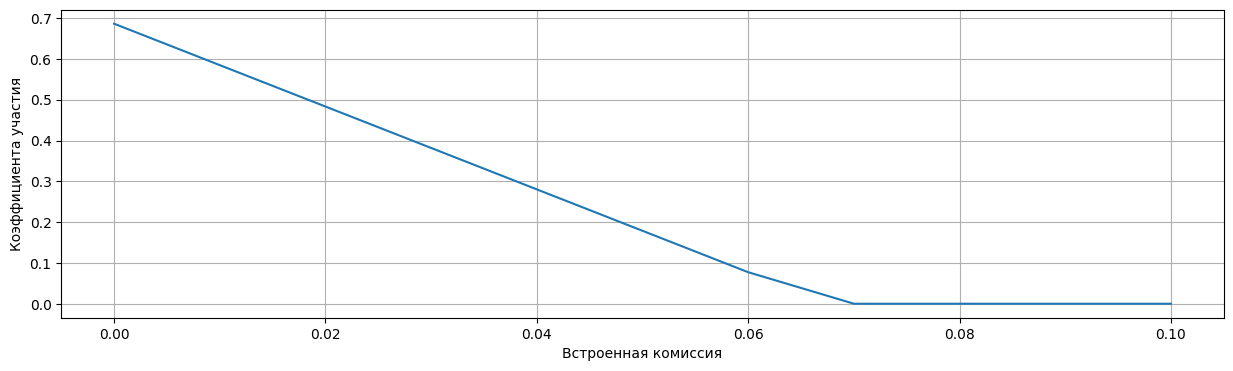

In [36]:
da = np.exp(-r * T) * N

Q = lambda fees: ( N * (1 - fees)  - da ) / c
fees = (np.linspace(0.0, 0.1, 11))
PR = K * Q(fees) / N

plt.figure(figsize=(15, 4))
#plt.title('PR from fees value')
plt.plot(fees, np.maximum(PR, 0))
plt.xlabel('Встроенная комиссия')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Постройте график зависимости коэффициента участия от процентных ставок (депозитная и безрисковая ставки равны), проварьируйте ставки от 0 до 20% с шагом 1%.

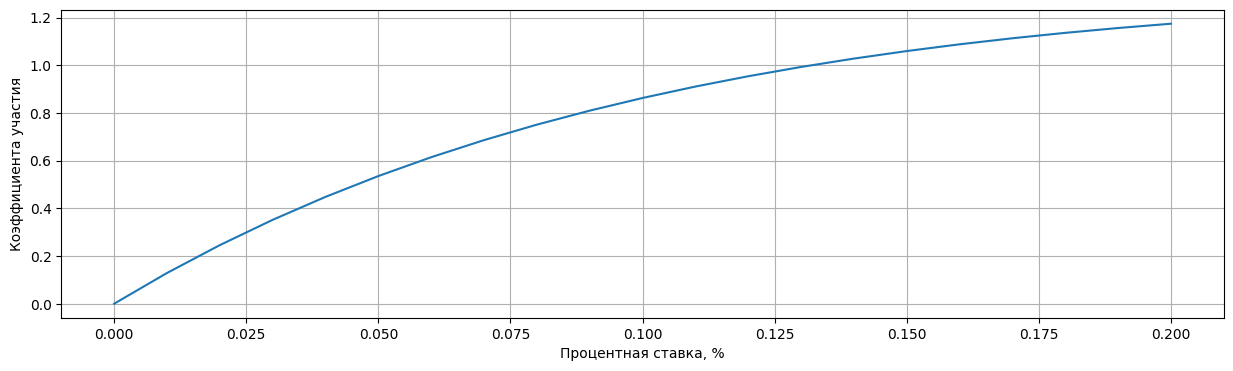

In [37]:
Q = lambda da, c: ( N * (1 - 0.0)  - da ) / c
rs = np.linspace(0, 0.2, 21)
cs = np.fromiter((call(S, K, T, sigma, ri, q) for ri in rs), dtype=np.float32)
das = np.exp(-rs * T) * N
Qs = np.fromiter((Q(da,c) for da,c in zip(das, cs)), dtype=np.float32)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from interest rate')
plt.plot(rs, np.maximum(PR, 0))
plt.xlabel('Процентная ставка, %')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

### Задача

Задача. Постройте трехмерных график зависимости коэффициента участия от депозитной и безрисковой ставок, проварьируйте ставки от 0 до 25% с шагом 1%.

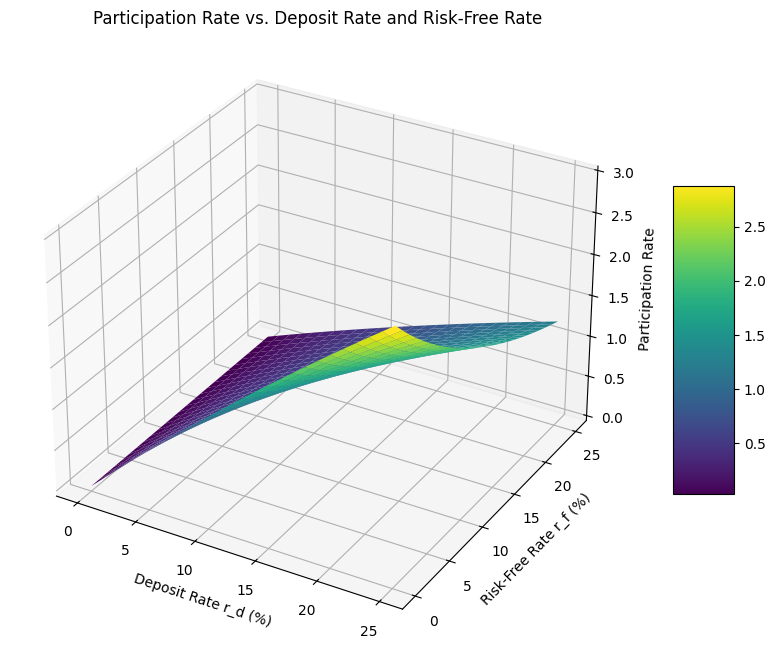

In [38]:
fees = 0.0   # Embedded commission (0% for this task)

def call(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

r_ds = np.linspace(0, 0.25, 26)  
r_fs = np.linspace(0, 0.25, 26) 

R_d, R_f = np.meshgrid(r_ds, r_fs)

PR = np.zeros_like(R_d)

for i in range(len(r_ds)):
    for j in range(len(r_fs)):
        r_d = R_d[i, j]
        r_f = R_f[i, j]
        da = N * np.exp(-r_d * T) 
        c = call(S, K, T, sigma, r_f, q)  
        Q = (N * (1 - fees) - da) / c if c != 0 else 0 
        PR[i, j] = K * Q / N


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(R_d * 100, R_f * 100, PR, cmap='viridis', edgecolor='none')
ax.set_xlabel('Deposit Rate r_d (%)')
ax.set_ylabel('Risk-Free Rate r_f (%)')
ax.set_zlabel('Participation Rate')
ax.set_title('Participation Rate vs. Deposit Rate and Risk-Free Rate')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Пример. Постройте график зависимости коэффициента участия от волатильности базового актива, проварьируйте волатильность от 0 до
100% с шагом 5%.

C:\Users\smart\AppData\Local\Temp\ipykernel_15852\102214163.py:4: RuntimeWarning: divide by zero encountered in divide
  Q = lambda c: ( N * (1 - 0.0)  - da ) / c


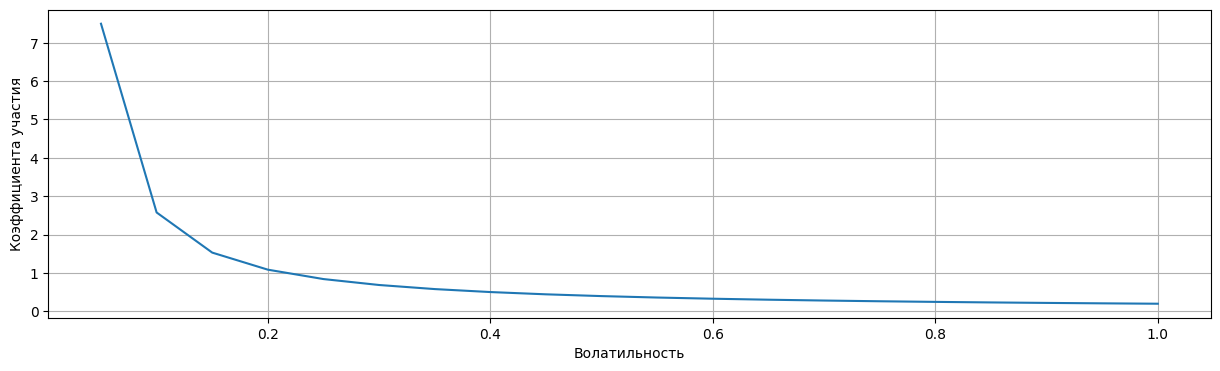

In [39]:
vs = np.linspace(1e-5, 1, 21)
cs = call(S, K, T, vs, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from volatility')
plt.plot(vs, PR)
plt.xlabel('Волатильность')
plt.ylabel('Коэффициента участия')
plt.grid()
plt.show()

Пример. Постройте график влияния срока продукта (от 0 до 100 лет, с
шагом 6 месяцев) на соотношение безрискового и рискового вложений.

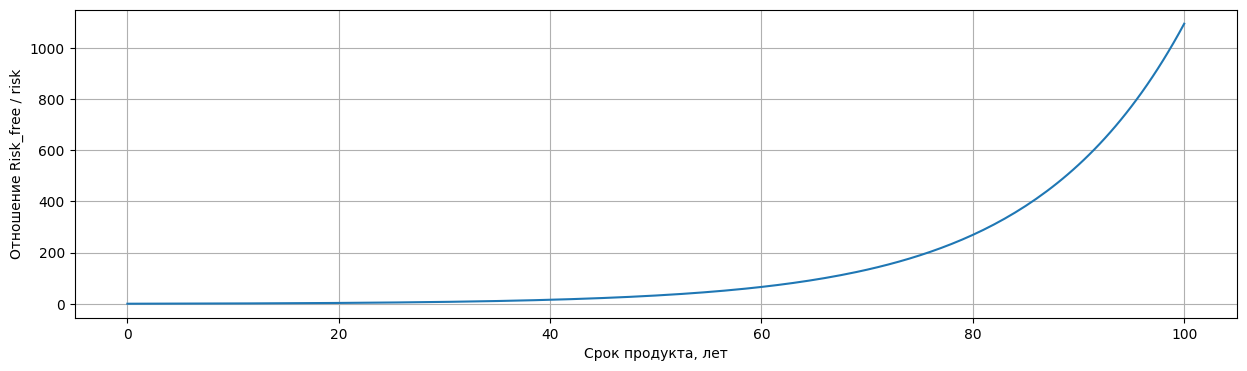

In [40]:
Ts = np.linspace(1e-5, 100, 201)
risk_parts = N - N * np.exp(-r * Ts)
ratios = risk_parts / (N - risk_parts)

plt.figure(figsize=(15, 4))
#plt.title('Risk-free to risk fraction relation on maturity date')
plt.plot(Ts, ratios)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Отношение Risk_free / risk')
plt.grid()
plt.show()

Пример. Постройте график зависимости коэффициента участия от срока
продукта (от 0 до 20 лет, с шагом 6 месяцев).


C:\Users\smart\AppData\Local\Temp\ipykernel_15852\4026867300.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c


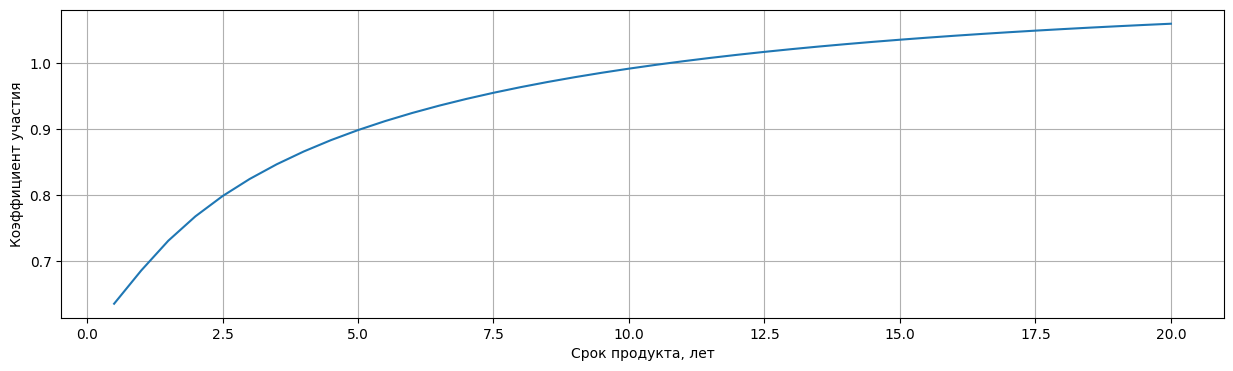

In [41]:
Ts = np.linspace(1e-5, 20, 41)
cs = call(S, K, Ts, sigma, r, q)
das = np.exp(-r * Ts) * N
Q = lambda c, d: ( N * (1 - 0.0)  - d ) / c
Qs = np.fromiter((Q(c, d) for c,d in zip(cs, das)), dtype=np.float64)
PR = K * Qs / N

plt.figure(figsize=(15, 4))
#plt.title('PR from maturity date')
plt.plot(Ts, PR)
plt.xlabel('Срок продукта, лет')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график коэффициента участия от страйка продукта
(от 80 до 140, с шагом 10).

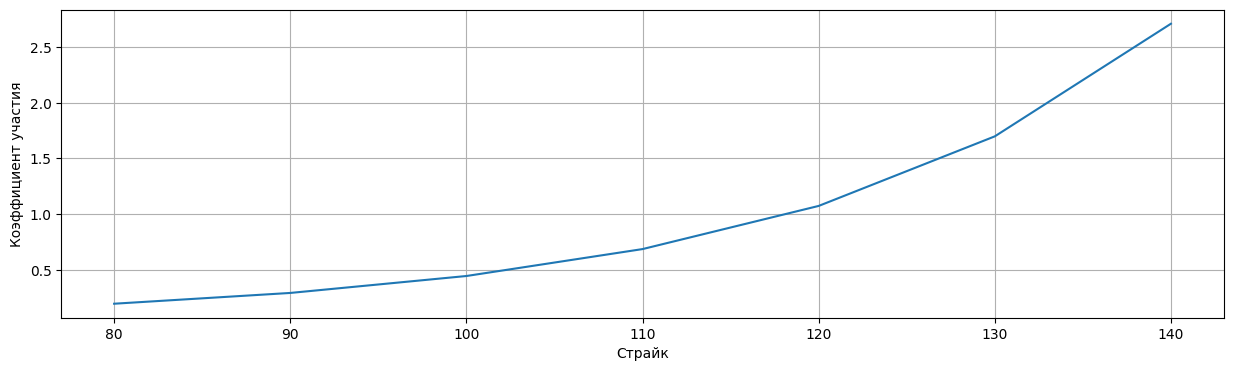

In [42]:
Ks = np.linspace(80, 140, 7)
cs = call(S, Ks, T,  sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
Qs = Q(cs)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
plt.plot(Ks, PR)
plt.xlabel('Страйк')
plt.ylabel('Коэффициент участия')
plt.grid()
plt.show()

Пример. Постройте график доходности продуктов с разными страйками и
100% защитой капитала.

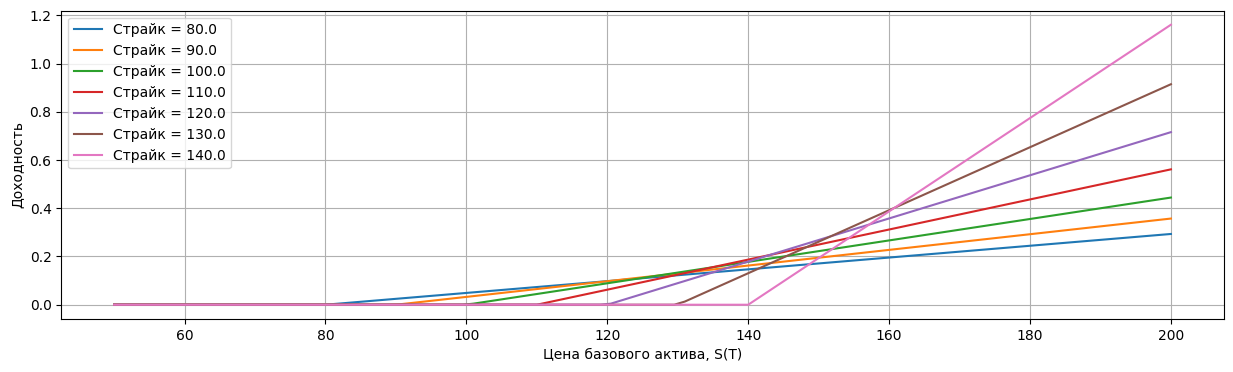

In [43]:
Ks = np.linspace(80, 140, 7)

cs = call(S, Ks, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da) / c
Qs = Q(cs)
# Qs = np.fromiter((Q(c) for c in zip(cs, das)), dtype=np.float64)
PR = np.fromiter(((Kv * Qv / N) for Kv, Qv in zip(Ks, Qs)), dtype=np.float32)
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('Profit on UA')
for i, pr in enumerate(PR):
    rs = np.maximum(0, pr * (Sm - Ks[i]) / Ks[i])
    plt.plot(Sm, rs, label=f'Страйк = {Ks[i]}')
plt.xlabel('Цена базового актива, S(T)')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

Пример. Постройте графики доходностей продуктов с одним страйком и
разной степенью защиты капитала (от 80% до 150%, с шагом 10%)

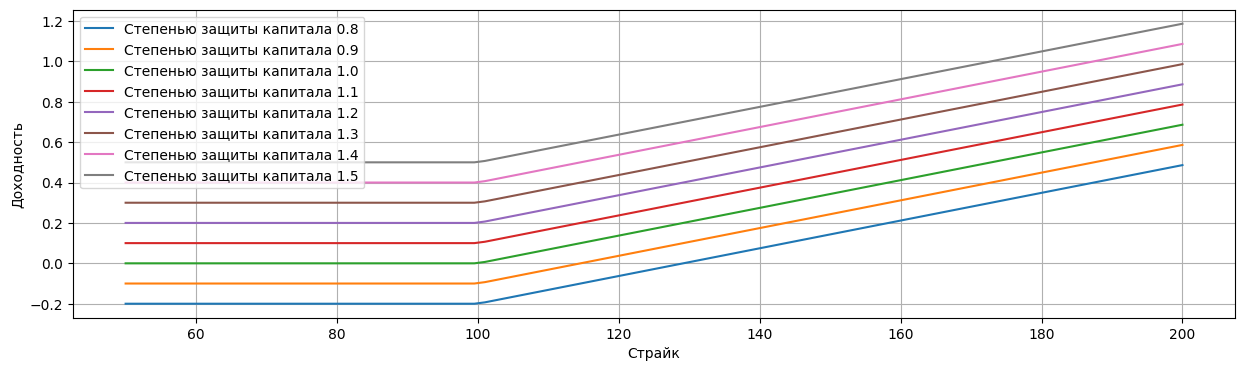

In [44]:
gs = np.linspace(0.8, 1.5, 8)
c = call(S, K, T, sigma, r, q)
da = np.exp(-r * T) * N
Q = lambda c: ( N * (1 - 0.0)  - da ) / c
PR = K * Q(c) / N
Sm = np.linspace(0.5*S, 2*S, 101)

plt.figure(figsize=(15, 4))
#plt.title('PR from strike')
for i, g in enumerate(gs):
    returns = np.maximum(g - 1, (g - 1) + PR * (Sm - S)/S)
    plt.plot(Sm, returns, label=f'Степенью защиты капитала {g}')
plt.xlabel('Страйк')
plt.ylabel('Доходность')
plt.legend()
plt.grid()
plt.show()

### Задача

Задача. В условиях примера постройте 3D график зависимости доходности структурного продукта от

*   страйков и
*   степени защиты капитала.

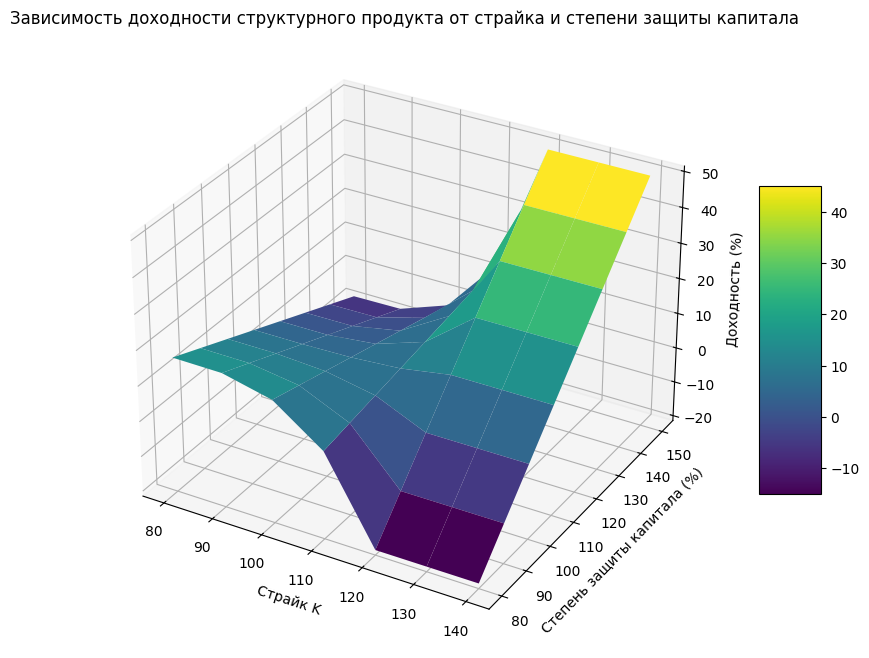

In [45]:
from mpl_toolkits.mplot3d import Axes3D

Ks = np.arange(80, 141, 10)   
gs = np.arange(0.8, 1.51, 0.1)   
S0 = 100
ST = 120 


def call_price(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


K_grid, g_grid = np.meshgrid(Ks, gs)

returns = np.zeros_like(K_grid, dtype=np.float64)

for i in range(len(gs)):
    for j in range(len(Ks)):
        K = K_grid[i, j]
        g = g_grid[i, j]

        c = call_price(S0, K, T, sigma, r, q)
        da = N * g * np.exp(-r * T)
        if c != 0:
            Q = (N * (1 - fees) - da) / c
        else:
            Q = 0

        option_payoff = Q * np.maximum(ST - K, 0)

        total_payoff = da * np.exp(r * T) + option_payoff
        return_rate = (total_payoff - N) / N
        returns[i, j] = return_rate * 100 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

g_percent = g_grid * 100

surf = ax.plot_surface(K_grid, g_percent, returns, cmap='viridis', edgecolor='none')

ax.set_xlabel('Страйк K')
ax.set_ylabel('Степень защиты капитала (%)')
ax.set_zlabel('Доходность (%)')
ax.set_title('Зависимость доходности структурного продукта от страйка и степени защиты капитала')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


Пример. В условиях примера для опциона колл повторите все расчеты с использованием бинарной стратегии, основанной на покупке и продаже европейского опциона пут.

Ширину диапазона доходности базового актива задать самостоятельно. Выбор обосновать.

In [46]:
K1 = 100
bo1 = binary_option_put('cash-or-nothing', S, K1, T, r, q, sigma)
K2=110
bo2 = binary_option_put('cash-or-nothing', S, K2, T, r, q, sigma)
print('digital range = ', -bo1+bo2)

risk_part = N - N*np.exp(-r*T)
Q = round(risk_part/(-bo1+bo2))
print('количество опционных стратегий', Q)

print('максимальная доходность, годовых = ', (N+Q)/(N*T)-1)
print('максимальная доходность, непрерывно = ', np.log((N+Q)/(N*T)))

digital range =  0.11734811871736428
количество опционных стратегий 57612
максимальная доходность, годовых =  0.57612
максимальная доходность, непрерывно =  0.45496613066900204


Пример. Постройте график функции выплат для бинарных стратегий, основанных
*   на покупке и продаже опционов колл,
*  на покупке и продаже опционов пут.



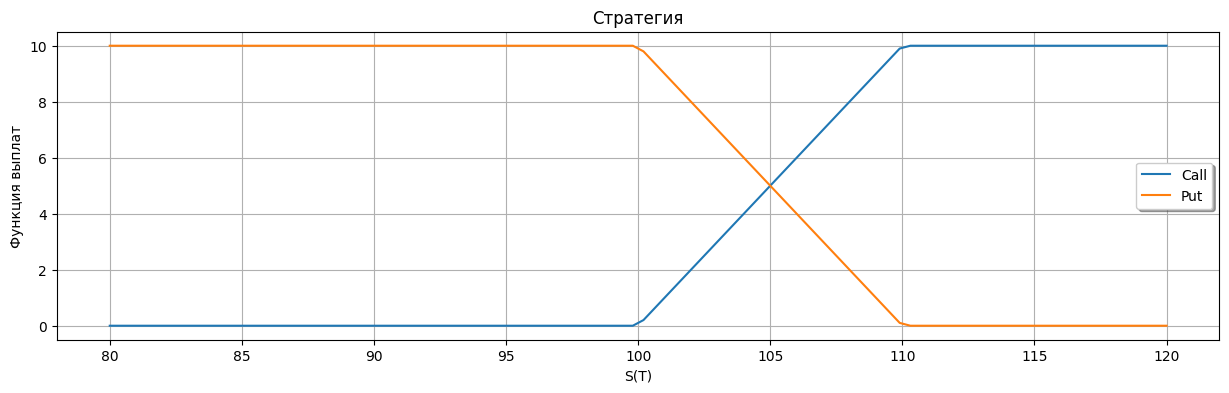

In [47]:
S = np.linspace(80, 120, 100)

C1 = np.maximum(S - K1, 0)
C2 = np.maximum(S - K2, 0)

P1 = np.maximum(-S + K1, 0)
P2 = np.maximum(-S + K2, 0)
plt.figure(figsize=(15,4))
plt.plot(S, C1 - C2, label=f'Call')
plt.plot(S, -P1 + P2, label=f'Put')
plt.legend(loc = 'best', fancybox = True, shadow = True)

plt.xlabel(f"S(T)")
plt.ylabel("Функция выплат")
plt.title("Стратегия")

plt.grid(True)
plt.show()

### Задача

Задача. Постройте графики трехмерных поверхностей для описания зависимости коэффициента участия при использовании бинарных опционов  
*   кол,
*   пут

от стоимости базового актива и количества дней до экспирации.

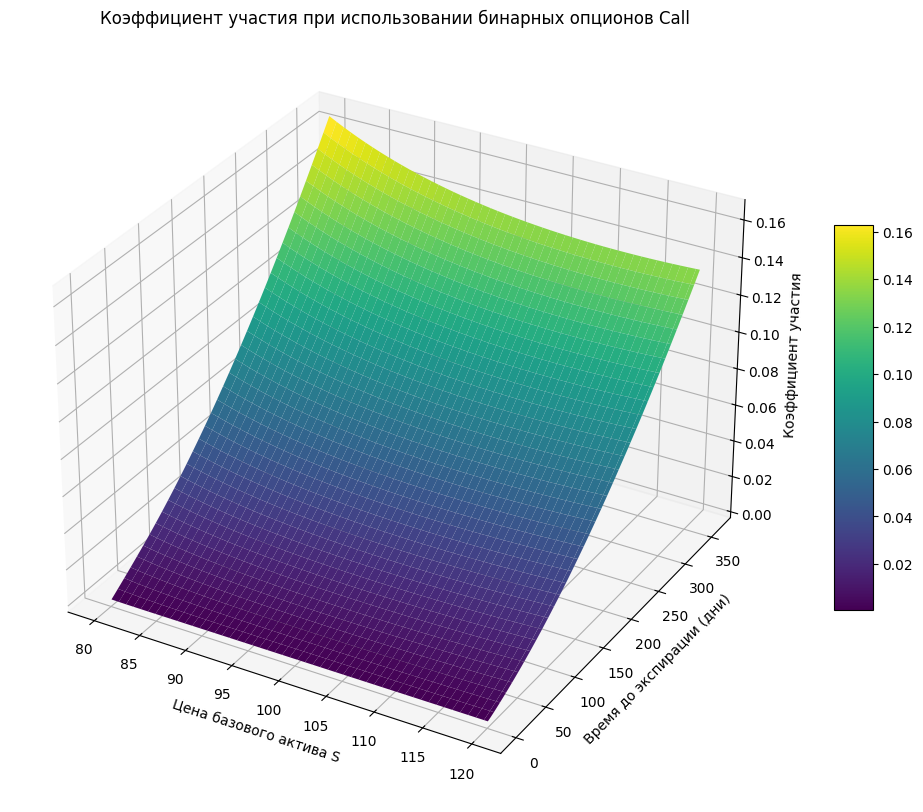

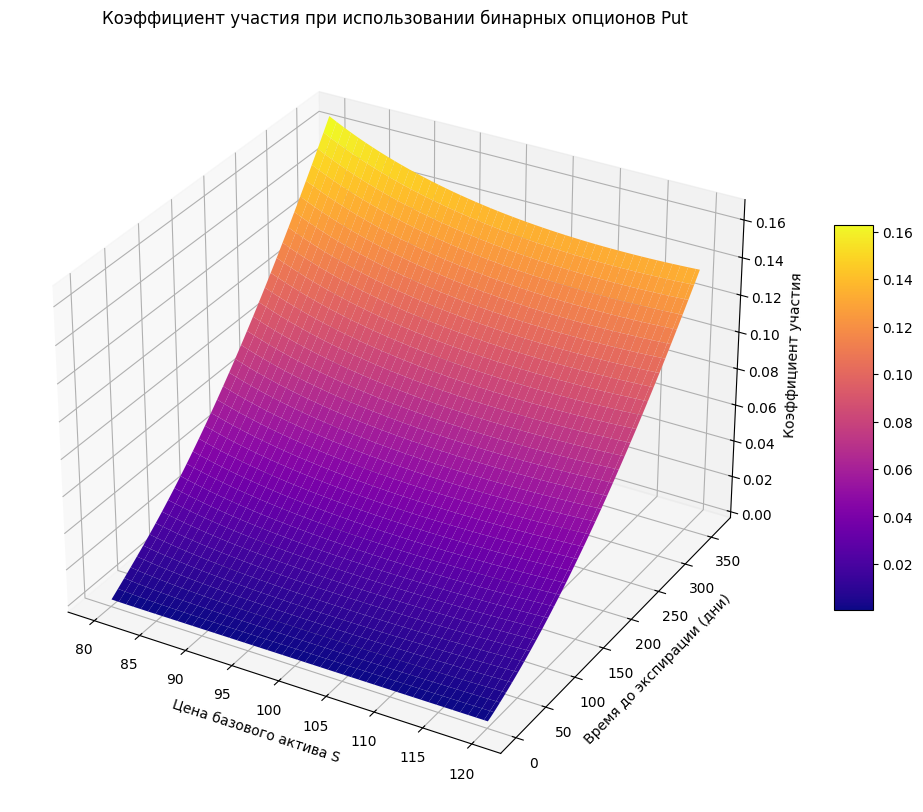

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


r = 0.05       
q = 0.02      
sigma = 0.3   
N = 1000   

K1 = 90      
K2 = 110     

# --- Функции для оценки бинарных опционов ---
def binary_option_call(S, K, T, r, q, sigma):
    """
    Оценка цены бинарного опционa Call (cash-or-nothing).
    """
    with np.errstate(divide='ignore', invalid='ignore'):
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(d2)

def binary_option_put(S, K, T, r, q, sigma):
    """
    Оценка цены бинарного опциона Put (cash-or-nothing).
    """
    with np.errstate(divide='ignore', invalid='ignore'):
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return np.exp(-r * T) * norm.cdf(-d2)


S_values = np.linspace(80, 120, 100)          
days_to_expiration = np.arange(1, 366, 5)   
T_values = days_to_expiration / 365        

S_grid, T_grid = np.meshgrid(S_values, T_values)


sigma = 0.5  

K1 = 80
K2 = 130

b_call_K1 = binary_option_call(S_grid, K1, T_grid, r, q, sigma)
b_call_K2 = binary_option_call(S_grid, K2, T_grid, r, q, sigma)


strategy_cost_call = np.maximum(b_call_K1 - b_call_K2, 1e-6)


mask_call = strategy_cost_call > 1e-6
PR_call = np.zeros_like(S_grid)
PR_call[mask_call] = (risk_part[mask_call] / strategy_cost_call[mask_call]) / N


fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf_call = ax.plot_surface(S_grid, T_grid * 365, PR_call, cmap='viridis', edgecolor='none')
ax.set_xlabel('Цена базового актива S')
ax.set_ylabel('Время до экспирации (дни)')
ax.set_zlabel('Коэффициент участия')
ax.set_title('Коэффициент участия при использовании бинарных опционов Call')
fig.colorbar(surf_call, shrink=0.5, aspect=10)
plt.show()


b_put_K1 = binary_option_put(S_grid, K1, T_grid, r, q, sigma)
b_put_K2 = binary_option_put(S_grid, K2, T_grid, r, q, sigma)

strategy_cost_put = np.maximum(b_put_K2 - b_put_K1, 1e-6)
mask_put = strategy_cost_put > 1e-6
PR_put = np.zeros_like(S_grid)
PR_put[mask_put] = (risk_part[mask_put] / strategy_cost_put[mask_put]) / N

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
surf_put = ax.plot_surface(S_grid, T_grid * 365, PR_put, cmap='plasma', edgecolor='none')
ax.set_xlabel('Цена базового актива S')
ax.set_ylabel('Время до экспирации (дни)')
ax.set_zlabel('Коэффициент участия')
ax.set_title('Коэффициент участия при использовании бинарных опционов Put')
fig.colorbar(surf_put, shrink=0.5, aspect=10)
plt.show()




## CП с использованием гэп опционов

### Задача

Задача. Рассмотрим гэп опционы колл и пут на недивидендные акции со страйком 57 и сроком действия, истекающим 1 июля следующего года, на 1 января текущего года акции торгуются по цене 50.

Используя эти данные, вычислите цену опциона колл и пут, если безрисковая ставка равна 9%, цена страйк 50, волатильность 20%.

In [49]:
S = 50       
K1 = 57     
K2 = 50
T = 1.5        
r = 0.09       
sigma = 0.20 
q = 0

def calculate_d1_d2(S, K1, T, r, q, sigma):
    d1 = (np.log(S / K1) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

def gap_call_option_price(S, K1, K2, T, r, q, sigma):
    d1, d2 = calculate_d1_d2(S, K1, T, r, q, sigma)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K2 * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def gap_put_option_price(S, K1, K2, T, r, q, sigma):
    d1, d2 = calculate_d1_d2(S, K1, T, r, q, sigma)
    put_price = K2 * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return put_price


gap_call_price = gap_call_option_price(S, K1, K2, T, r, q, sigma)
gap_put_price = gap_put_option_price(S, K1, K2, T, r, q, sigma)

print(f"Цена гэп опциона колл: {gap_call_price:.2f}")
print(f"Цена гэп опциона пут: {gap_put_price:.2f}")


Цена гэп опциона колл: 7.76
Цена гэп опциона пут: 1.45


В рамках модели Блэка-Шоулза решите следующие задачи для бинарных опционов.

Пример. Маркет-мейкер продает европейские гэп-колл опционы сумму 1000 сроком на один год и дельта-хеджирует позицию акциями.
Опцион гэп-колл выписан на одну акцию, не приносящую дивидендов. Текущая цена акции составляет 100.

Волатильность акции составляет 100\%. Каждый колл-гэп опцион  имеет цену исполнения 130, триггер цена равна  100. Безрисковая процентная ставка равна 0\%.

В рамках модели Блэка-Шоулза определите начальное количество акций для  дельта-хеджирования.

**Указание.** Определите дельту опциона и умножьте на 1000.

In [50]:
def first_derivative (f , x , args, h = 0.0001) :
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)

In [51]:
def gap_option_price_call(S, K1, K2, T, r, q, sigma):
    """
    Вычисляет цену гэп-колл опциона.
    """
    d1 = (np.log(S / K2) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * np.exp(-q * T) * norm.cdf(d1) - K1 * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def first_derivative(f, x, args, h=0.0001):
    """
    Численное вычисление первой производной функции f по переменной x.
    """
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)

S = 100       
K1 = 130   
K2 = 100     
T = 1        
r = 0.0      
sigma = 1.0  
q = 0.0       

c = gap_option_price_call(S, K1, K2, T, r, q, sigma)

delta = first_derivative(gap_option_price_call, S, (K1, K2, T, r, q, sigma))

number_of_shares = delta * 1000

print(f"Цена гэп-колл опциона: {c:.2f}")
print(f"Дельта опциона: {delta:.4f}")
print(f"Начальное количество акций для дельта-хеджирования: {round(number_of_shares)}")


Цена гэп-колл опциона: 29.04
Дельта опциона: 0.5858
Начальное количество акций для дельта-хеджирования: 586


### Задача

Задача. В условиях примера определите начальное количество акций для дельта-хеджирования с использованием пут-гэп опционов. Выбор цены исполнения и триггер цены обосновать.

In [52]:
def gap_option_price_put(S, K1, K2, T, r, q, sigma):
    """Вычисляет цену пут-гэп опциона."""
    d1 = (np.log(S / K2) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K1 * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    return put_price

def first_derivative(f, x, args, h=1e-5):
    """Численное вычисление первой производной функции f по переменной x."""
    return (f(x + h, *args) - f(x - h, *args)) / (2 * h)


S = 100      
K1 = 70       
K2 = 100    
T = 1       
r = 0.0       
sigma = 1.0  
q = 0.0    


p = gap_option_price_put(S, K1, K2, T, r, q, sigma)

delta = first_derivative(gap_option_price_put, S, (K1, K2, T, r, q, sigma))

number_of_options = 1000
number_of_shares = delta * number_of_options

print(f"Цена пут-гэп опциона: {p:.2f}")
print(f"Дельта опциона: {delta:.4f}")
print(f"Начальное количество акций для дельта-хеджирования: {int(round(number_of_shares))}")


Цена пут-гэп опциона: 17.55
Дельта опциона: -0.2029
Начальное количество акций для дельта-хеджирования: -203


Пример. Безрисковая процентная ставка составляет 6%, волатильность бездивидендных акций составляет 32%. Четырехлетний опцион пут «деньги или ничего» на эту акцию с триггерной ценой 135 имеет премию 0,32494. Найдите цену 4-летнего опциона колл «актив или ничего» на эту акцию с триггерной ценой 135.

In [53]:
r = 0.06
sigma = 0.32
T = 4
K = 135
q = 0
put = 0.32494
put_type = 'cash-or-nothing'

opt_func = lambda x: binary_option_put(put_type, x, K, T, r, q, sigma) - put
S = fsolve(opt_func, K)[0]

call_type = 'asset-or-nothing'
call = binary_option_call(call_type, S, K, T, r, q, sigma)
call

TypeError: binary_option_put() takes 6 positional arguments but 7 were given

Пример. Волатильность базового актива 25%, волатильность годового опциона колл со страйком 50 на акции составляет 120,68%. Маркет-мейкер выписывает один опцион колл и дельта хеджирует свою позицию. Стоимость акции в хеджирующем портфеле равна 34,74. Найдите цену годового опциона «деньги или ничего» колл на акцию с триггерной ценой 50.

In [ ]:
r = 0.00
sigma_S = 0.25
sigma_call = 1.2068
K = 50
T = 1
K2 = 50
S_hedge = 34.74
q = 0
call_type = 'cash-or-nothing'
call = binary_option_call(call_type, S_hedge, K, T, r, q, sigma_S)
call

0.05687902614969493

### Задача

Задача. На акции по текущей цене 75 выплачивают дивиденды по ставке 2% (непрырывное начисление), волатильность акций 40%. Коэффициент Шарпа для акции равен 0. Шестимесячный опцион «актив или ничего» колл на акцию с триггером 80 стоит 36,65.

Рассчитайте вероятность того, что опцион колл «актив или ничего» будет исполнен.

В условиях примера проанализируйте зависимость вероятности исполнения опциона колл «актив или ничего» от коэффициента Шарпа.

Приведите иллюстративные графики.

In [ ]:
t = 1/2
S0 = 75
sigma = 0.4
q = 0.02
sharpe = 0.0
r = np.abs(sharpe - q)
c = 36.65
K2 = 80

Риск-нейтральная вероятность исполнения опциона: 0.3558


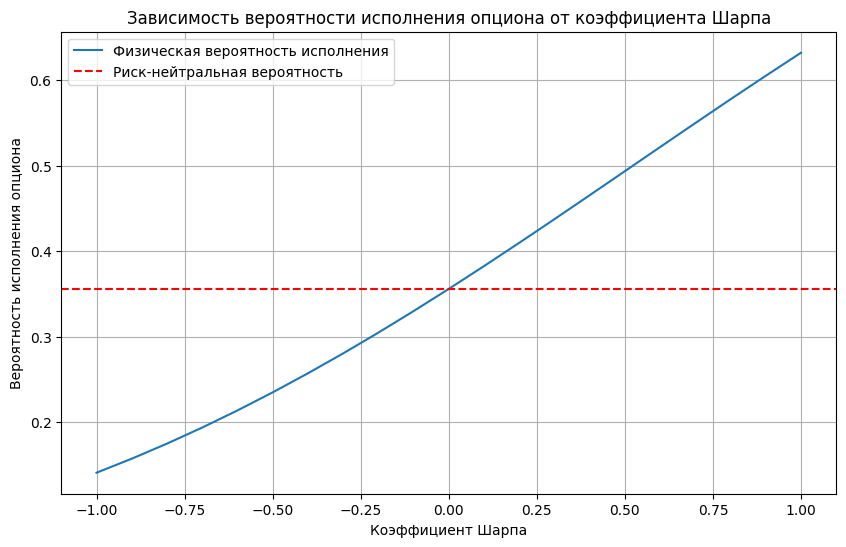

In [ ]:
t = 0.5     
S0 = 75      
K = 80       
sigma = 0.4 
q = 0.02    
c = 36.65  


sigma_sqrt_t = sigma * np.sqrt(t)
ln_S0_over_K = np.log(S0 / K)

sharpe_values = np.linspace(-1.0, 1.0, 21)
prob_physical = []

for sharpe in sharpe_values:
    mu = q + sharpe * sigma 
    d1P = (ln_S0_over_K + (mu - q + 0.5 * sigma ** 2) * t) / sigma_sqrt_t
    d2P = d1P - sigma_sqrt_t
    prob = norm.cdf(d2P) 
    prob_physical.append(prob)

r = 0.02 
d1_rn = (ln_S0_over_K + (r - q + 0.5 * sigma ** 2) * t) / sigma_sqrt_t
d2_rn = d1_rn - sigma_sqrt_t
prob_rn = norm.cdf(d2_rn)

print(f'Риск-нейтральная вероятность исполнения опциона: {prob_rn:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(sharpe_values, prob_physical, label='Физическая вероятность исполнения')
plt.axhline(y=prob_rn, color='r', linestyle='--', label='Риск-нейтральная вероятность')
plt.xlabel('Коэффициент Шарпа')
plt.ylabel('Вероятность исполнения опциона')
plt.title('Зависимость вероятности исполнения опциона от коэффициента Шарпа')
plt.legend()
plt.grid(True)
plt.show()
